# BI

Desember 2021

In [1]:
import dhlab.module_update as mu
import dhlab.nbtext as nb
mu.update('dhlab_v2', silent = True)
mu.update('graph_networkx_louvain', silent = True)
import pandas as pd
import dhlab_v2 as d2
import graph_networkx_louvain as gnl

In [2]:
mu.css('css.css')

# DH-lab - Nasjonalbiblioteket

DH - Digital Humanioria: tolkning og analyse av digitale objekter, tekst og bilde og ...


# For hvem?

Alle!

SSB, UiO, OsloMet, Høgskulen i Volda, NTNU, Universitetet i Agder, UiB

Bøker og avhandlinger


# FAIR

Findable Accessible Interoperability Reusability

Dataene skal kunne finnes, nås, være interoperable og kunne gjenbrukes

## NB N-gram



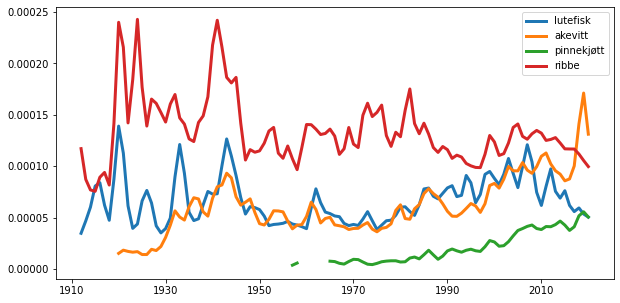

In [3]:
d2.Ngram(['lutefisk', 'akevitt', 'pinnekjøtt', 'ribbe'], from_year = 1910, to_year = 2020).plot(figsize=(10,5), lw = 3)

In [4]:
G = d2.make_word_graph('lutefisk akevitt pinnekjøtt ribbe'.split(), cutoff = 24)

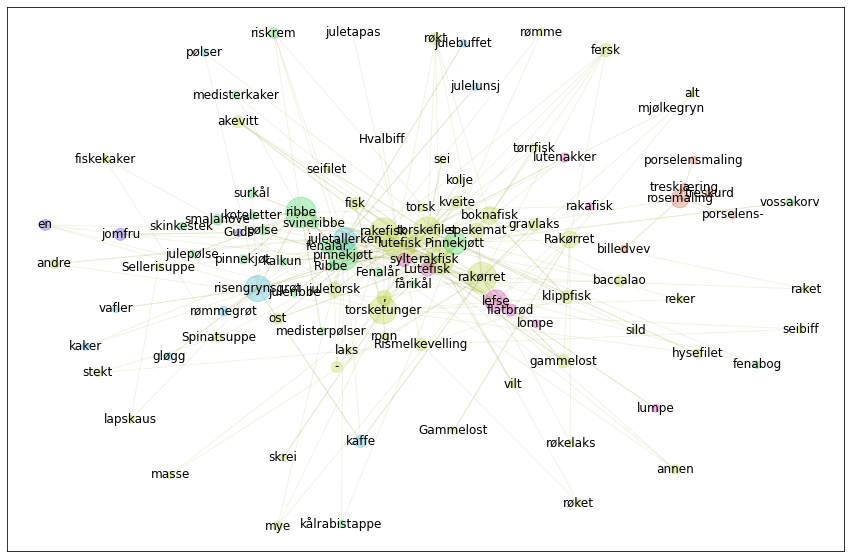

In [5]:
gnl.show_graph(G, spread = 1.1, fontsize = 12)

In [6]:
gnl.show_communities(G)

lutefisk-rakørret :  lutefisk, rakørret, rakfisk, rakefisk, torsketunger, torskefilet, boknafisk, Rakørret, spekemat, ,, juletorsk, gammelost, fersk, klippfisk, røkt, gravlaks, kveite, akevitt, fisk, Rismelkevelling, baccalao, ost, -, Spinatsuppe, annen, tørrfisk, mye, hysefilet, andre, Sellerisuppe, fiskekaker, masse, laks, raket, røkelaks, seifilet, alt, lapskaus, skrei, Gammelost, stekt, rømme, vilt, rogn, reker, sei, sild, kolje, seibiff, torsk, røket, juletapas, Hvalbiff, mjølkegryn

ribbe-pinnekjøtt :  ribbe, pinnekjøtt, Pinnekjøtt, fenalår, riskrem, smalahove, pinnekjøt, Ribbe, pølse, svineribbe, surkål, Fenalår, juleribbe, medisterpølser, medisterkaker, skinkestek, fårikål, koteletter, kalkun, julepølse, vossakorv, kålrabistappe, fenabog

risengrynsgrøt-juletallerken :  risengrynsgrøt, juletallerken, kaffe, rømmegrøt, julelunsj, kaker, pølser, julebuffet, vafler, gløgg

jomfru-en :  jomfru, en, Guds

lefse-Lutefisk :  lefse, Lutefisk, sylte, flatbrød, lutenakker, lompe, lumpe, 

## Korpus 

En samling referanser til tekster. Samme som nettbiblioteket


In [13]:
word1 = 'økonomi'

startår = 2000
sluttår = 2010

corpus = d2.document_corpus(subject = word1, doctype = 'digibok', 
                             from_year = startår, to_year = sluttår, limit = 5000, lang = 'nob')

In [14]:
agg = d2.get_document_frequencies(list(corpus.urn.sample(200)))

combo = pd.DataFrame(c1_agg.sum(axis = 1))
combo.columns = ["frekvens"]

In [15]:
corpus.sample(5)["urn title authors city year publisher subjects ddc literaryform".split()]

,urn,title,authors,city,year,publisher,subjects,ddc,literaryform
19,URN:NBN:no-nb_digibok_2009021004121,Bedre engelsk forretningsspråk : norsk-engelsk...,"Hansen , Einar",Oslo,2000,Cappelen akademisk forl.,English language / Dictionaries / Reference ma...,658.00321,Faglitteratur
187,URN:NBN:no-nb_digibok_2021010707595,Fritt fall : finanskrisen og utveier,"Bank , Helene / Nordhaug , Kristen",[Siggerud],2009,Res Publica,Finanser / finanskriser / finanser / økonomi /...,332.042 / 332.042,Faglitteratur
349,URN:NBN:no-nb_digibok_2011062106058,Golfen og oljemarkedet ett år etter 11. september,"Noreng , Øystein",Sandvika,2002,"Handelshøyskolen BI, Institutt for ledelse og ...",olje / politikk / økonomi,,Uklassifisert
392,URN:NBN:no-nb_digibok_2013011706066,Produktlevetid og miljø : muligheter og hindri...,"Strandbakken , Pål",[Tromsø],2006,Universitetet i Tromsø,forbruksvarer / økonomi / miljøøkonomi / ressu...,306.3,Faglitteratur
333,URN:NBN:no-nb_digibok_2011071205500,Matematikk for økonomi og samfunnsfag,"Bjørnestad , Harald / Olsson , Ulf Henning / T...",Kristiansand,2004,Høyskoleforl.,Lineær algebra / Integralregning / Derivasjon ...,510 / 511,Faglitteratur


In [16]:
combo.head(5)

,frekvens
.,129030.0
",",91670.0
og,68692.0
i,71889.0
av,49772.0


In [17]:
(combo.loc["bank penger kroner og . ,".split()]).fillna(0).round(0).sort_values(by = 'frekvens', ascending = False).style.background_gradient(axis = 1)

,frekvens
.,129030.000000
",",91670.000000
og,68692.000000
kroner,1214.000000
penger,420.000000
bank,170.000000


# Ny konkordans 

In [20]:
x = d2.Concordance(corpus, "statsbudsjettet")
print(x.size)

1506


In [21]:
x.show()

,link,concordance
700,URN:NBN:no-nb_digibok_2008121100022,"... Det brukes likevel « oljepenger » også i denne perioden , i den forstand at det årlig overføres midler fra petroleumsfondet for å dekke underskuddet i statsbudsjettet utenom..."
289,URN:NBN:no-nb_digibok_2018072748103,"... Giverne spiller en stor rolle i landet , kanskje mer enn de 30 - 40 prosent av statsbudsjettet som er bistand , skulle tilsi ."
384,URN:NBN:no-nb_digibok_2010050308045,Litt om statsbudsjettet 156
1011,URN:NBN:no-nb_digibok_2015072108147,"Siste hånd på verket i pensjonsreformen var en endring av pensjonistskatten . I statsbudsjettet som ble lagt frem i starten på oktober 2010 , kom detaljene ."
178,URN:NBN:no-nb_digibok_2012110608167,... for 8 prosent av importen . Befolkningens generelle levestandard og kjøpekraft er økende . Statsbudsjettet for 2003 gikk som nevnt i overskudd og ble i sin helhet...
533,URN:NBN:no-nb_digibok_2015041008137,"... Stortinget sluttet seg til dette og har i statsbudsjettet for 2001 bevilget 2,45 mrd. kroner til investeringsselskapet , som skal etableres i partnerskap mellom private..."
1433,URN:NBN:no-nb_digibok_2011070706030,10. Rente- og ut bytte inntekter mv. i Statens petroleumsfond 11. Samlet overskudd på statsbudsjettet og i Statens petroleumsfond ( 7 + 10 )
380,URN:NBN:no-nb_digibok_2009121404181,"... Men det motvirkes når den årlige bruken av petroleumsinntekter over statsbudsjettet er forutsigbar og uavhengig av de årlige inntektsstrømmene , ( jf. omtalen av handlingsregelen nedenfor ) , og..."
882,URN:NBN:no-nb_digibok_2011100608091,... Ordningen med bruk av oppdaterte befolkningstall innebærer at det i statsbudsjettet om høsten beregnes et foreløpig innbyggertilskudd med utgiftsutjevning til den enkelte kommune basert på...
425,URN:NBN:no-nb_digibok_2014080508085,Bolig I statsbudsjettet for 2005 er det foreslått at fordelsbeskatningen av egen bolig skal bortfalle . I tillegg skal det heller ikke være mulig å trekke...


# Keyness

Nøkkelord

In [22]:
assoc = lambda agg: (agg.counts/agg.counts.sum())/(tot.freq/tot.freq.sum())

In [24]:
ref = d2.get_reference(corpus = 'digibok', from_year = startår, to_year = sluttår)

In [31]:
keyness = pd.concat([combo['frekvens'], (combo["frekvens"]/combo.frekvens.sum())/(ref.freq/ref.freq.sum())], axis = 1)

In [32]:
keyness.columns = ["frekvens", "pmi"]

In [40]:
keyness[keyness['frekvens'] > 100].sort_values(by = 'pmi', ascending = False).head(10)

,frekvens,pmi
EMNER,163.0,261.055905
Statfjord,442.0,252.501668
FAFO,270.0,217.826974
Pst,392.0,214.371154
NTNF,203.0,136.340101
prod,573.0,126.639961
avkastningskravet,245.0,125.595677
finanskostnader,119.0,112.990761
understell,126.0,97.948647
internrenten,107.0,96.809454


# Sjekk spesielle ord

In [41]:
keyness.loc[[x for x in "penger overforbruk luksus pensjon minstepensjonister finans finansinstitusjoner . ,".split() if x in keyness.index]].sort_values(by = 'pmi', ascending = False)

,frekvens,pmi
finansinstitusjoner,62.0,13.067670
overforbruk,14.0,7.074069
minstepensjonister,7.0,5.912345
finans,23.0,5.536448
pensjon,67.0,1.716412
penger,420.0,1.162155
.,129030.0,0.790167
",",91670.0,0.679269
luksus,7.0,0.534092


[nb.no](https://nb.no/)